In [98]:
import pandas as pd
data=pd.read_csv('Cell_stats_sim_1.csv',header=None)
data.columns = ['time', 'time_of_day','cell_id','cell_energy_pool','krat_pop','krat_energy','snake_pop','snake_energy']

In [99]:
#cell_id = str((0,0))
#data[data['time'] == 0].head(80)

In [100]:
data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
avg_cell_energy = data_initial_time['cell_energy_pool'].sum()/len(data_initial_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(initial_time,avg_cell_energy,initial_krat_pop,initial_snake_pop)
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
avg_cell_energy = data_final_time['cell_energy_pool'].sum()/len(data_final_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(final_time,avg_cell_energy,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Initial Stats
time: 0, Avg Cell Energy 2200.0, Krats 20, Snakes 3
Final Stats
time: 8759, Avg Cell Energy 2139.4875, Krats 14, Snakes 3


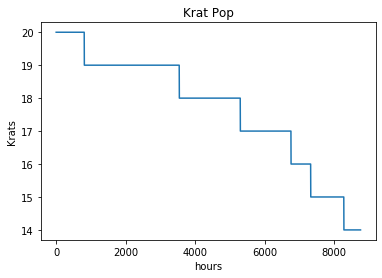

In [79]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [y for y in ytemp if y>0]
xtemp= list(df.index)
x = xtemp[0:len(y)]


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

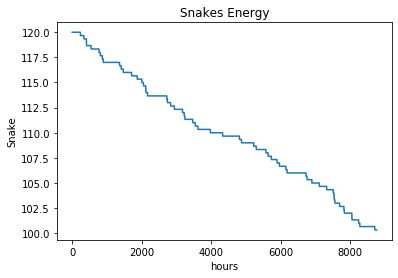

In [97]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
xtemp= list(df.index)
x = xtemp[0:len(y)]
y = list(df['average_snake_energy'])

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake")
plt.title("Snakes Energy")

plt.show()

In [96]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
df.head()

,time,snake_pop,snake_energy,average_snake_energy
0,0,3,360,120.0
1,1,3,360,120.0
2,2,3,360,120.0
3,3,3,360,120.0
4,4,3,360,120.0


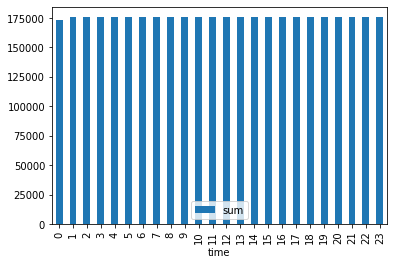

In [11]:
data.groupby('time')['cell_energy_pool'].agg(['sum']).plot(kind = 'bar')

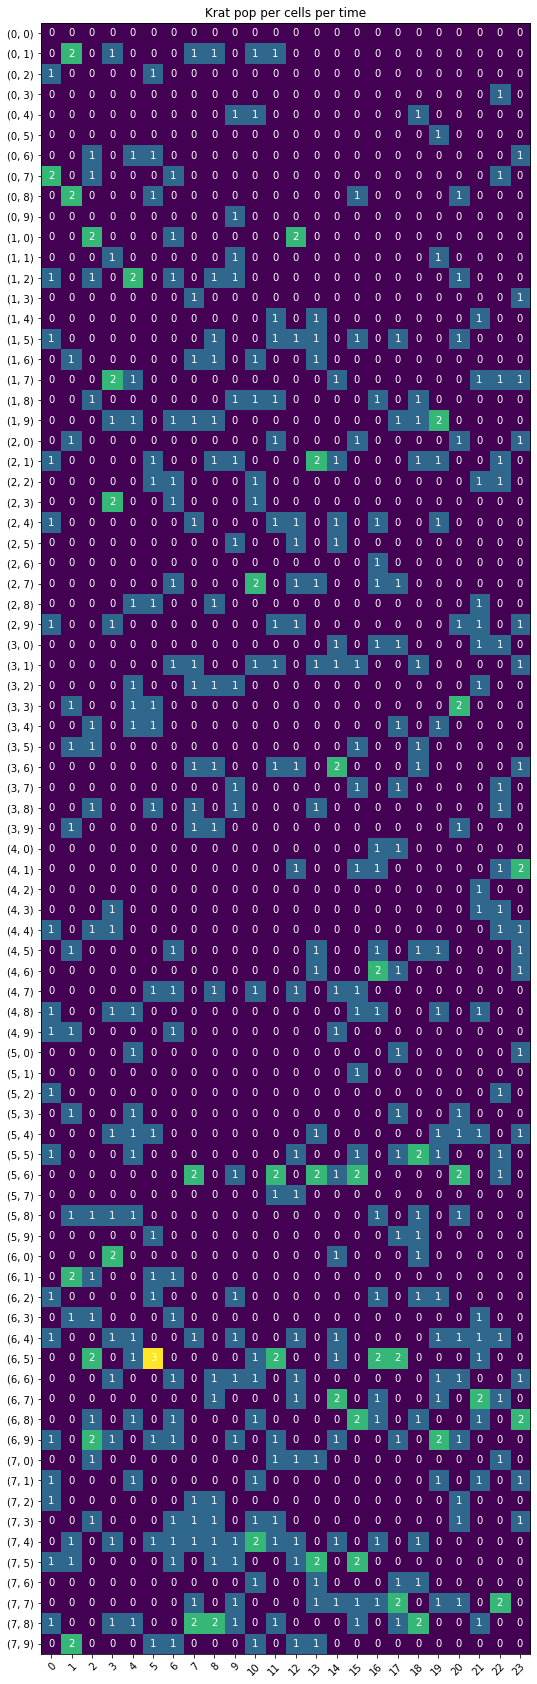

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = data['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

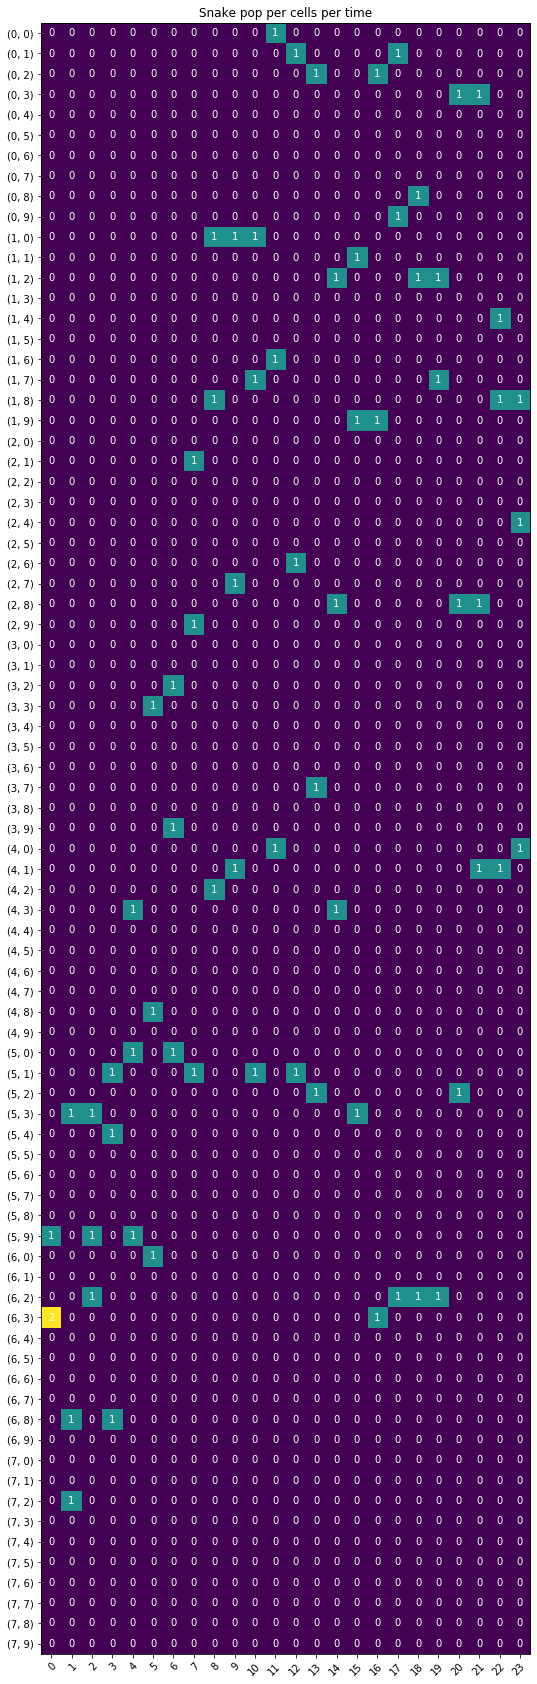

In [7]:

df = data[['time','cell_id','snake_pop']]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = data['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()